# Week 09 - Assumptions

* https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/
* https://towardsdatascience.com/how-to-simplify-hypothesis-testing-for-linear-regression-in-python-8b43f6917c86
* There is a linear regression relation between Y and X
* The error terms (residuals) are normally distributed
* The variance of the error terms is constant over all X values (homoscedasticity)
* The error terms are independent

In [1]:
# create some data and train test split
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=100, n_features=6, n_informative=3, effective_rank=3)
df = pd.DataFrame(data=X, columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])
df['y'] = y

X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], test_size=.25, random_state=42)

## Collinearity and Homoscedasticity

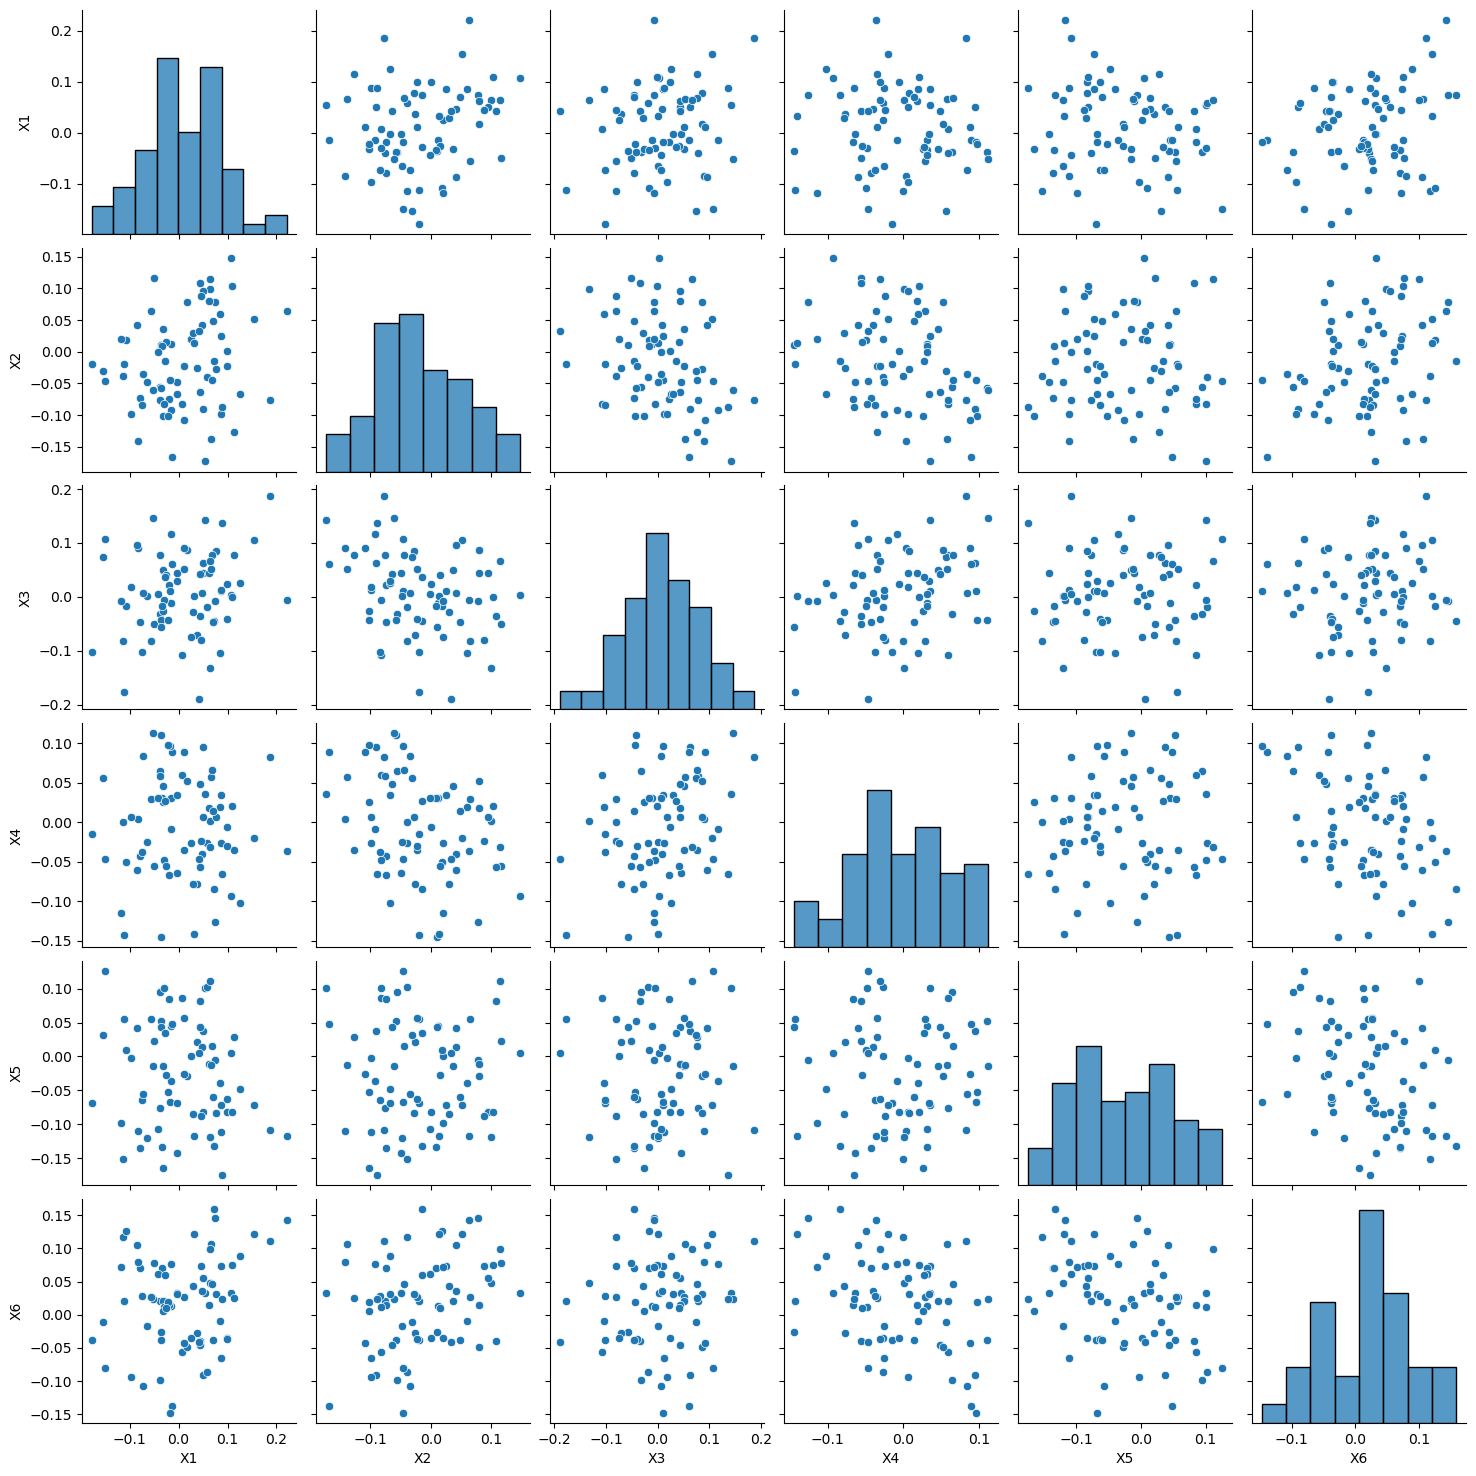

In [2]:
# pairplot checks for collinearity and homoscedasticity
# show relationships between two featurs
import seaborn as sns

sns.pairplot(X_train);

In [3]:
# create model
import statsmodels.api as sm

X_train.insert(0, 'const', 1)
X_test.insert(0, 'const', 1)
model = sm.OLS(y_train, X_train).fit()

## Partial Regression Plot

A subplot is created for each explanatory variable given by exog_idx. The partial regression plot shows the relationship between the response and the given explanatory variable after removing the effect of all other explanatory variables in exog.

https://www.statsmodels.org/devel/generated/statsmodels.graphics.regressionplots.plot_partregress_grid.html

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


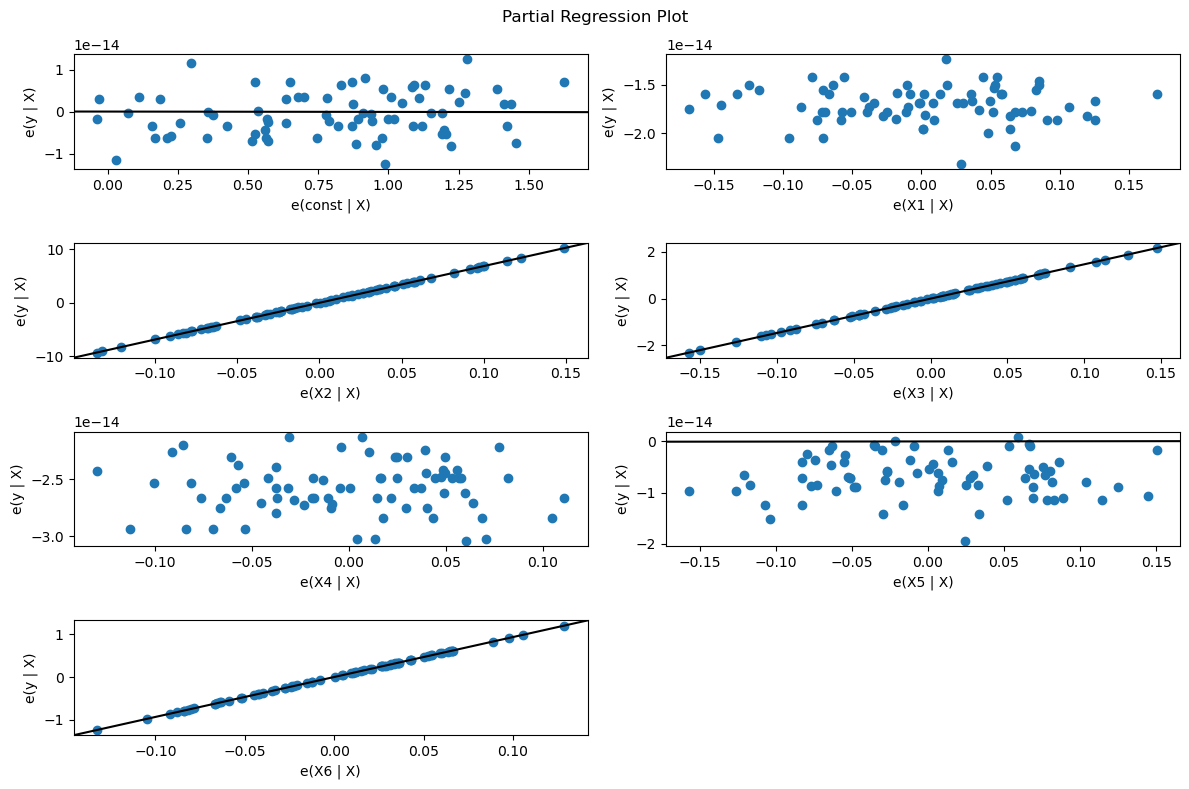

In [4]:
# https://www.kirenz.com/post/2021-11-14-linear-regression-diagnostics-in-python/linear-regression-diagnostics-in-python/
# check for linearity and homoscedasticity
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
plt.tight_layout();

## graphics.plot_regress_exog

* dependent variable and fitted values with prediction confidence intervals vs. the independent variable chosen
* the residuals of the model vs. the chosen independent variable
* a partial regression plot, and a
* CCPR plot: The CCPR (component and component-plus-residual plot) provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables.

Plot regression results against one regressor

eval_env: 1


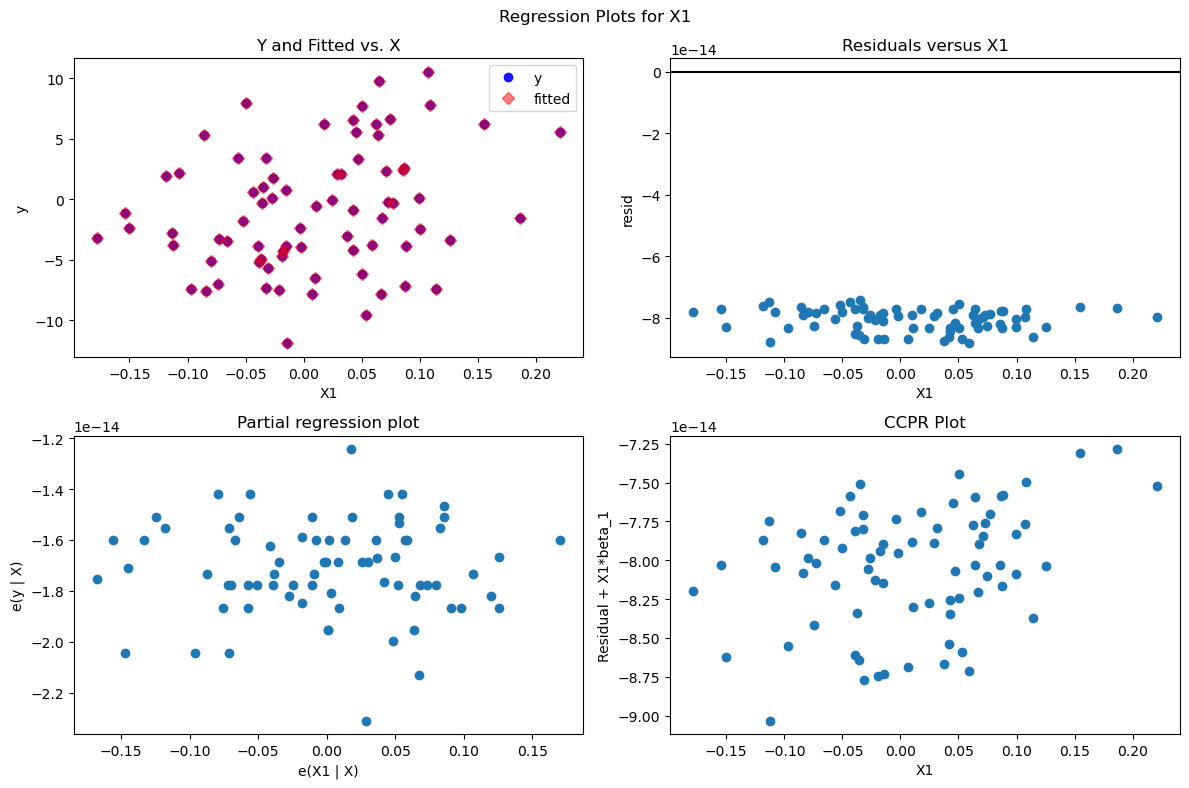

In [5]:
# ccpr checks linear relationship with the dependent variable
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'X1', fig=fig)
plt.tight_layout();

## More on Normality Testing

https://towardsdatascience.com/normality-testing-the-graphical-way-20902abd8543